In [5]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 30.0 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=d05532b829d973247f1f385947b0f2746b3a2f260a9681110430e03f09d9101c
  Stored in directory: /root/.cache/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer


In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# import factor analyzer library
from factor_analyzer import FactorAnalyzer

# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

#set working directory
os.chdir('/content')

In [7]:
#open raw data donwloaded from World Bank
data = pd.read_csv('https://raw.githubusercontent.com/ngaiyin1760/Factor-analysis-Cluster-analysis-on-countries-classification/master/raw%20data%20selected.csv')
data = data.sort_values(by=['Series Name', 'Country Name'])
data = data.set_index('Series Name')

indicators = sorted(set(data.index))
economies = sorted(set(data['Country Name']))
num_econ = len(economies)
columns = list(data.columns)
columns = columns[1:]
years = columns[2:]
yearlist = []

data = data[columns]

#set up a dataframe
df = pd.DataFrame(index = indicators, columns = economies)
datalog = pd.DataFrame(index = indicators)

#construct an usable dataframe
for indicator in indicators:
    
    year = 0
    
    #filtering out the indicators that too few countries provide
    for i in range(len(years)):
        if list(data.loc[indicator][years[i]] != '..').count(False) <= 35:
            if (year != 0) and (year != 1):
                if list(data.loc[indicator][years[i]] != '..').count(False) <= list(data.loc[indicator][years[year]] != '..').count(False):
                    year = i
            else:
                year = i
    
    #print the indicators and their latest years
    print(indicator, '-', years[year])
    yearlist.append(years[year])
    
    for economy in economies:
        try:
            #print(data.loc[data['Country Name'] == economy].loc[indicator].loc[years[year]])
            df.at[indicator, economy] = data.loc[data['Country Name'] == economy].loc[indicator].loc[years[year]]
        except:
            df.at[indicator, economy] = np.nan

#print the indicators and their years
datalog['Year'] = yearlist
#print(yearlist.count(years[0]))

datalog_selected = datalog[datalog['Year'] != years[0]] 
indicators_selected = list(datalog_selected.index)

df_selected = df.loc[indicators_selected]

indicators_count = []

for economy in economies:
    indicators_count.append(list(df_selected[economy] == '..').count(False))
    print(economy, '-', list(df_selected[economy] == '..').count(False))

print(indicators_count.count(datalog_selected.size))

count = dict(zip(economies, indicators_count))

#show selected economies
economies_selected = {key: count[key] for key in count if (count[key] == datalog_selected.size)}
#show dropped economies
economies_dropped = {key: count[key] for key in count if (count[key] < datalog_selected.size) and (count[key] >= datalog_selected.size-2)}

df_final= df_selected[economies_selected.keys()]
df_final = df_final.astype(float)

df_dropped = df_selected[economies_dropped.keys()]


Access to electricity, rural (% of rural population) - 2015 [YR2015]
Access to electricity, urban (% of urban population) - 2018 [YR2018]
Agriculture, forestry, and fishing, value added (% of GDP) - 2013 [YR2013]
Birth rate, crude (per 1,000 people) - 2014 [YR2014]
CO2 emissions (metric tons per capita) - 2014 [YR2014]
Current health expenditure (% of GDP) - 2011 [YR2011]
Death rate, crude (per 1,000 people) - 2014 [YR2014]
Diabetes prevalence (% of population ages 20 to 79) - 2019 [YR2019]
Employment in agriculture (% of total employment) (modeled ILO estimate) - 2019 [YR2019]
Employment in industry (% of total employment) (modeled ILO estimate) - 2019 [YR2019]
Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate) - 2019 [YR2019]
GDP growth (annual %) - 2014 [YR2014]
GDP per capita growth (annual %) - 2014 [YR2014]
Immunization, DPT (% of children ages 12-23 months) - 2018 [YR2018]
Individuals using the Internet (% of population) - 2017 [YR2017]
Industry (includ

<Axes: >

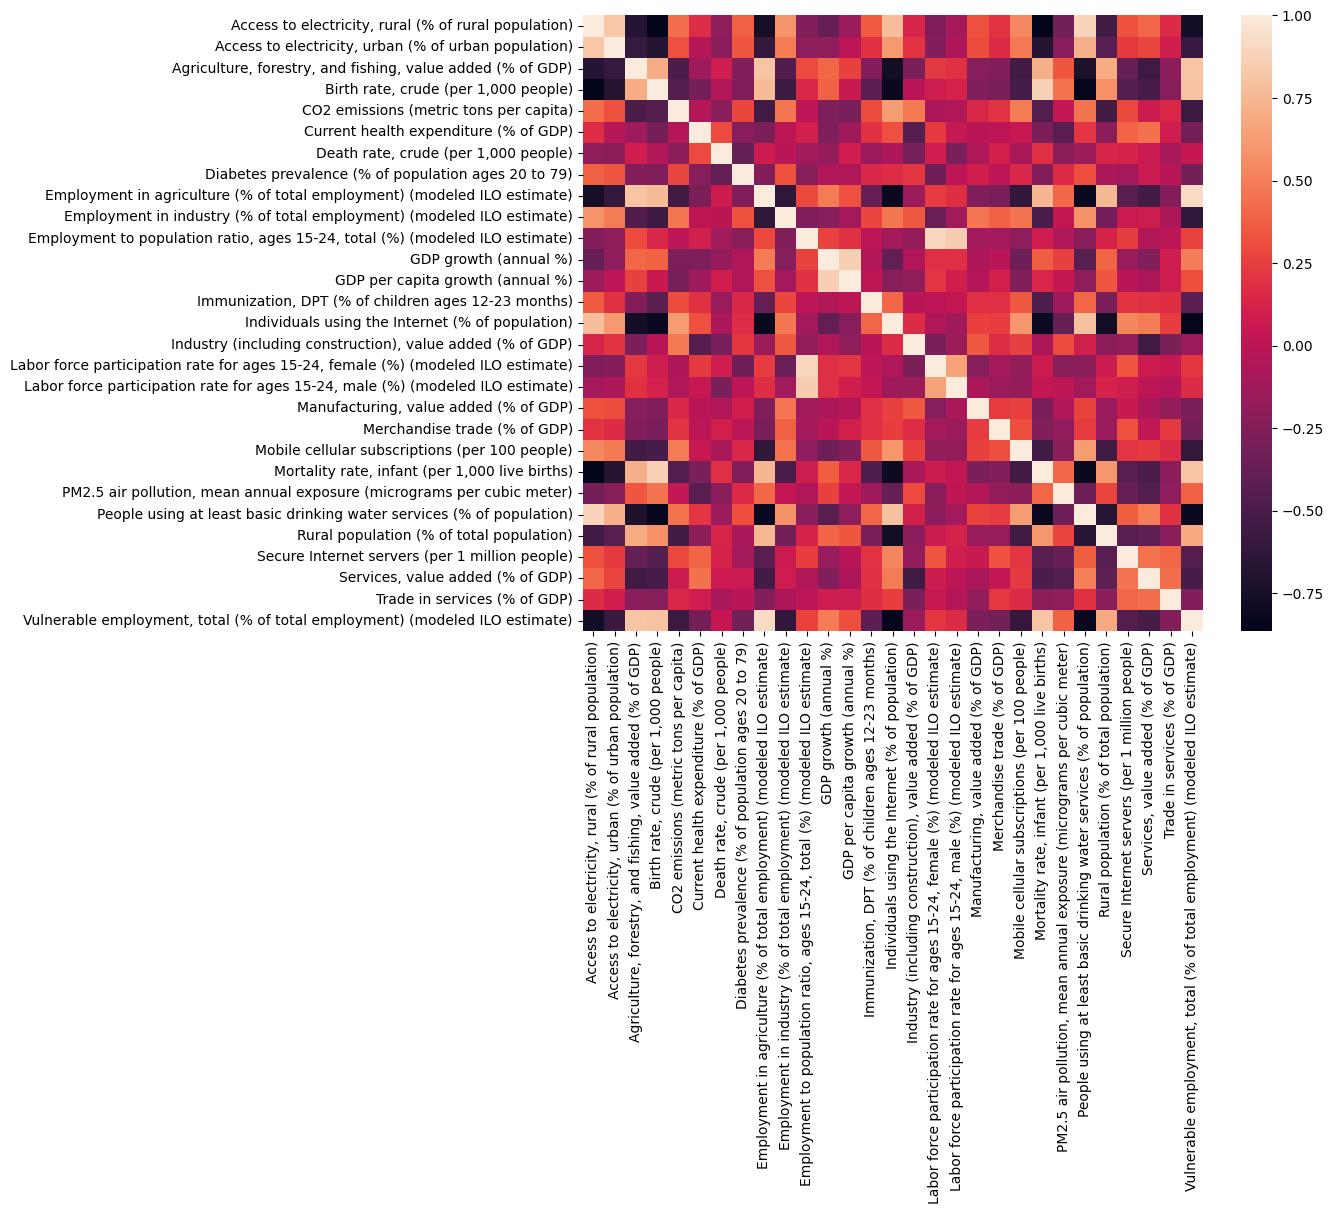

In [8]:
#Plot correlation matrix of indicators
plt.figure(figsize=(10,8))
corrMatrix = df_final.T.corr()
sns.heatmap(corrMatrix)

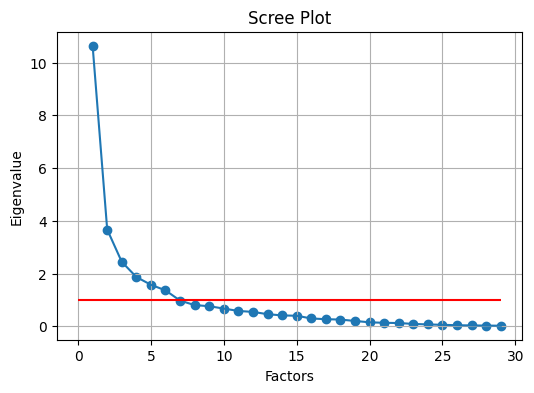

In [9]:

fa = FactorAnalyzer()
fa.fit(df_final.T, 25)

ev, v = fa.get_eigenvalues()

# Create scree plot using matplotlib
plt.figure(figsize=(6,4))
plt.scatter(range(1,df_final.T.shape[1]+1),ev)
plt.plot(range(1,df_final.T.shape[1]+1),ev)
plt.hlines(1, 0, df_final.T.shape[1], colors='r')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


[[ 9.23098527e-01 -1.03622444e-01 -1.69952177e-02 -7.56397889e-02
   1.68627742e-01  1.10811855e-01 -1.14156057e-01]
 [ 7.98886237e-01 -9.90136323e-02  1.29566712e-01  5.58118618e-02
   1.95405415e-01 -3.14625642e-03 -1.59213712e-01]
 [-7.95819248e-01  1.74389931e-01  1.66881372e-01 -1.14388487e-01
   1.96068652e-03 -4.57541475e-02 -2.01373801e-01]
 [-8.91906238e-01  2.30633636e-02 -7.62993279e-04  1.36760618e-01
   9.41647191e-02 -2.26881627e-01 -1.77341627e-02]
 [ 4.52723122e-01  7.12844927e-02 -2.67657042e-01  3.89566270e-01
   1.77486586e-01  3.09021393e-01  2.82098082e-01]
 [ 2.39313731e-01  1.60354754e-01 -1.90260852e-01 -4.12831619e-01
  -4.32465941e-01  5.07667835e-02  8.24092681e-02]
 [-1.38157880e-01 -1.74289200e-01 -1.46401438e-02 -1.78776087e-01
  -6.98574022e-01  1.20222715e-01 -1.05104496e-01]
 [ 2.69447016e-01 -1.39315082e-01 -8.37283319e-03 -5.00169725e-03
   5.67907845e-01  1.21559813e-01 -6.78056109e-02]
 [-8.20958999e-01  1.45347401e-01  2.61796902e-01  2.25746103e-0

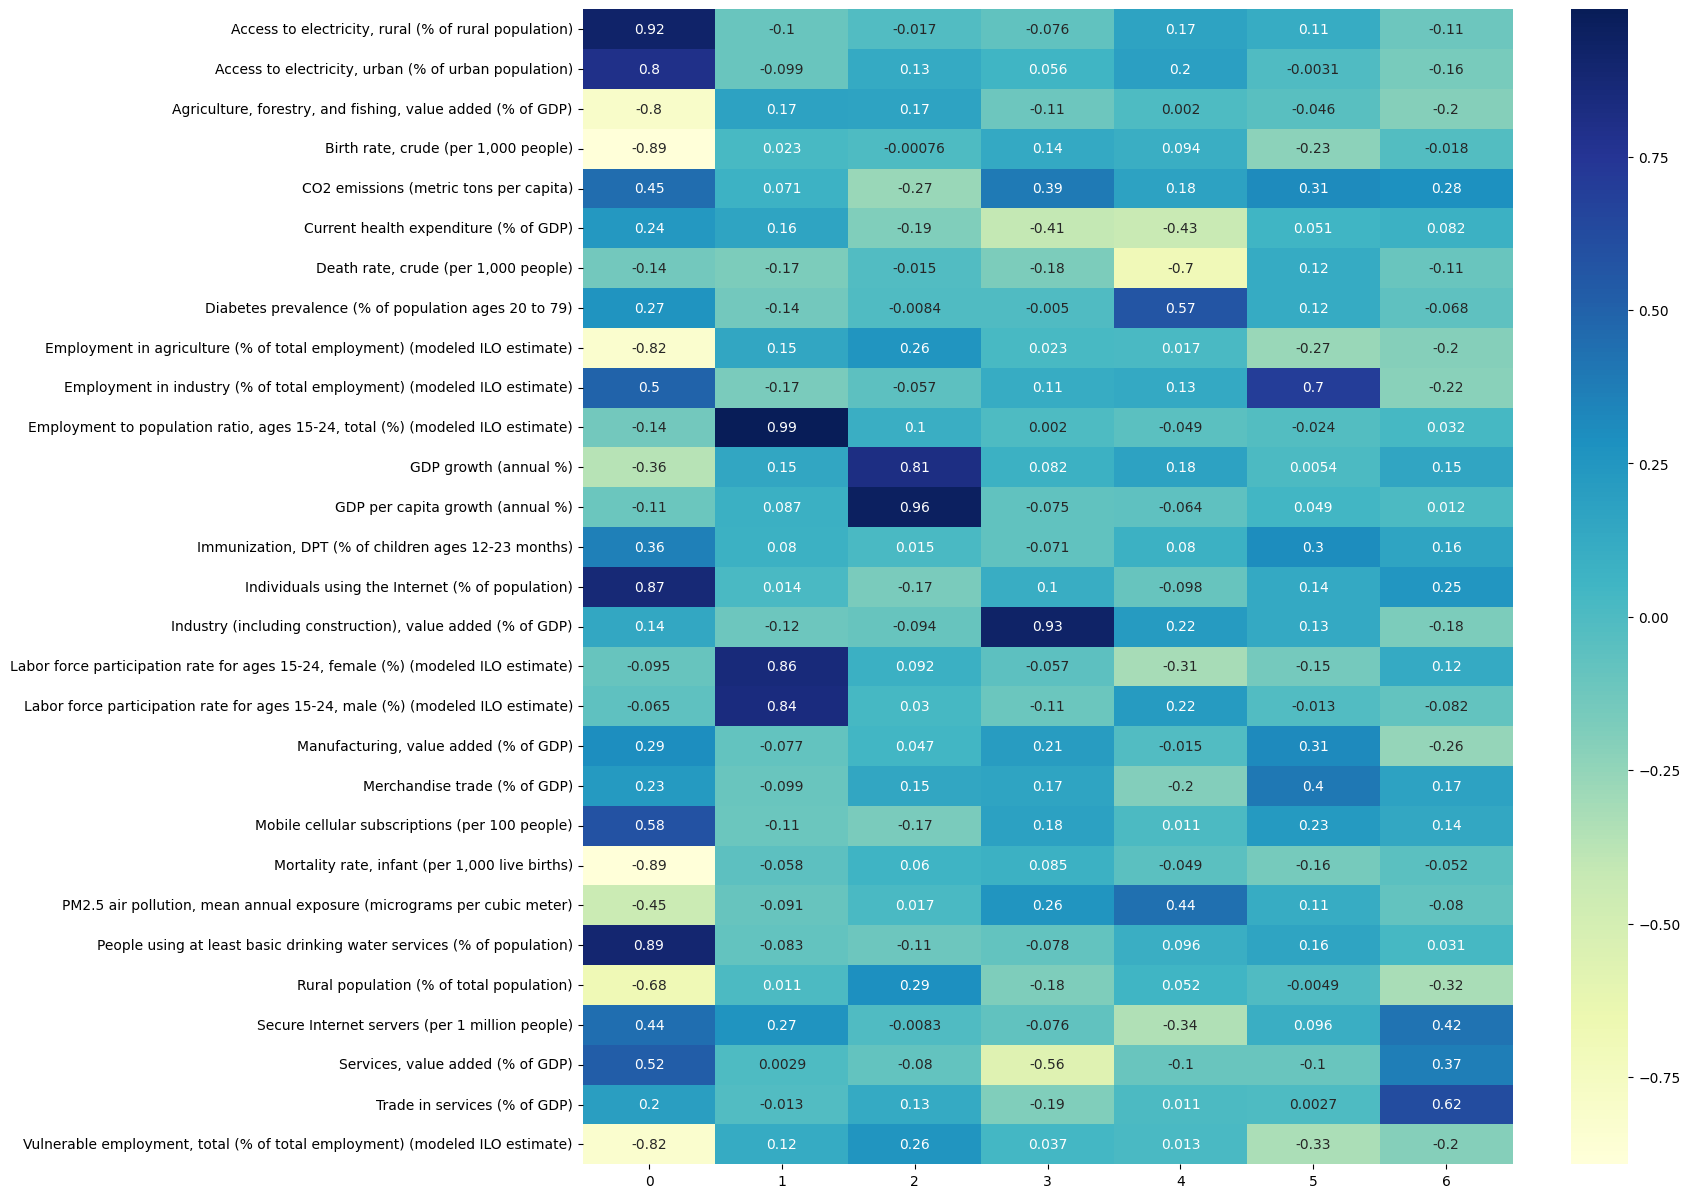

In [10]:
#Perform Factor Analysis
fa = FactorAnalyzer(list(ev >= 0.95).count(True), rotation='varimax')
fa.fit(df_final.T)
loads = fa.loadings_
print(loads)
loads = pd.DataFrame(loads, index=df_final.index)

#Heatmap of loadings
plt.figure(figsize=(15,15))
sns.heatmap(loads, annot=True, cmap="YlGnBu")

# Get variance of each factors
fa_var = fa.get_factor_variance()
fa_var = pd.DataFrame(fa_var, index=['SS loadings', 'Proportion Var', 'Cumulative Var'])
print(fa_var)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


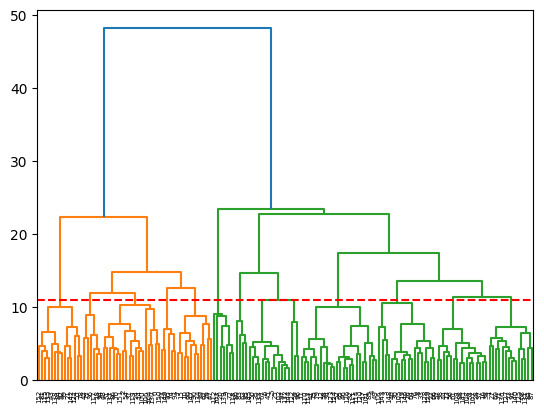

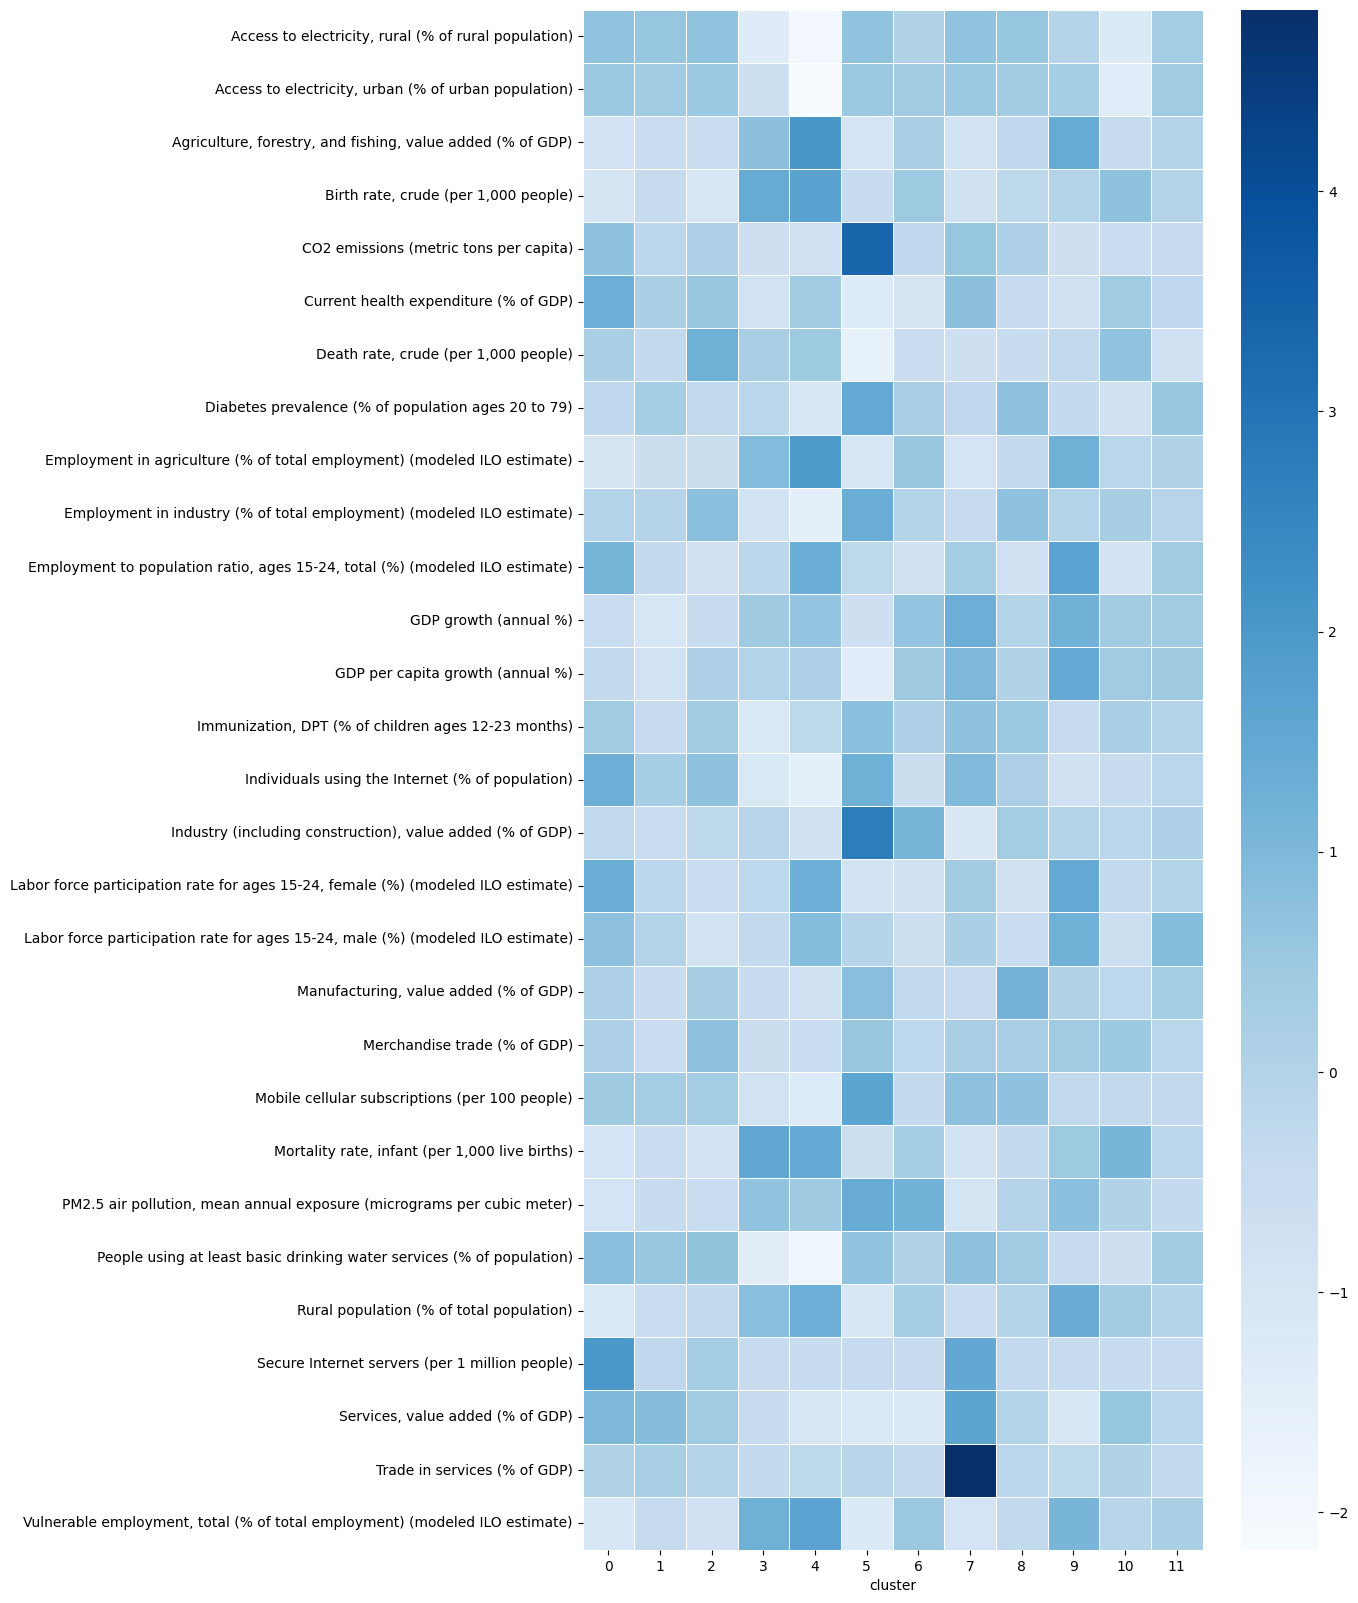

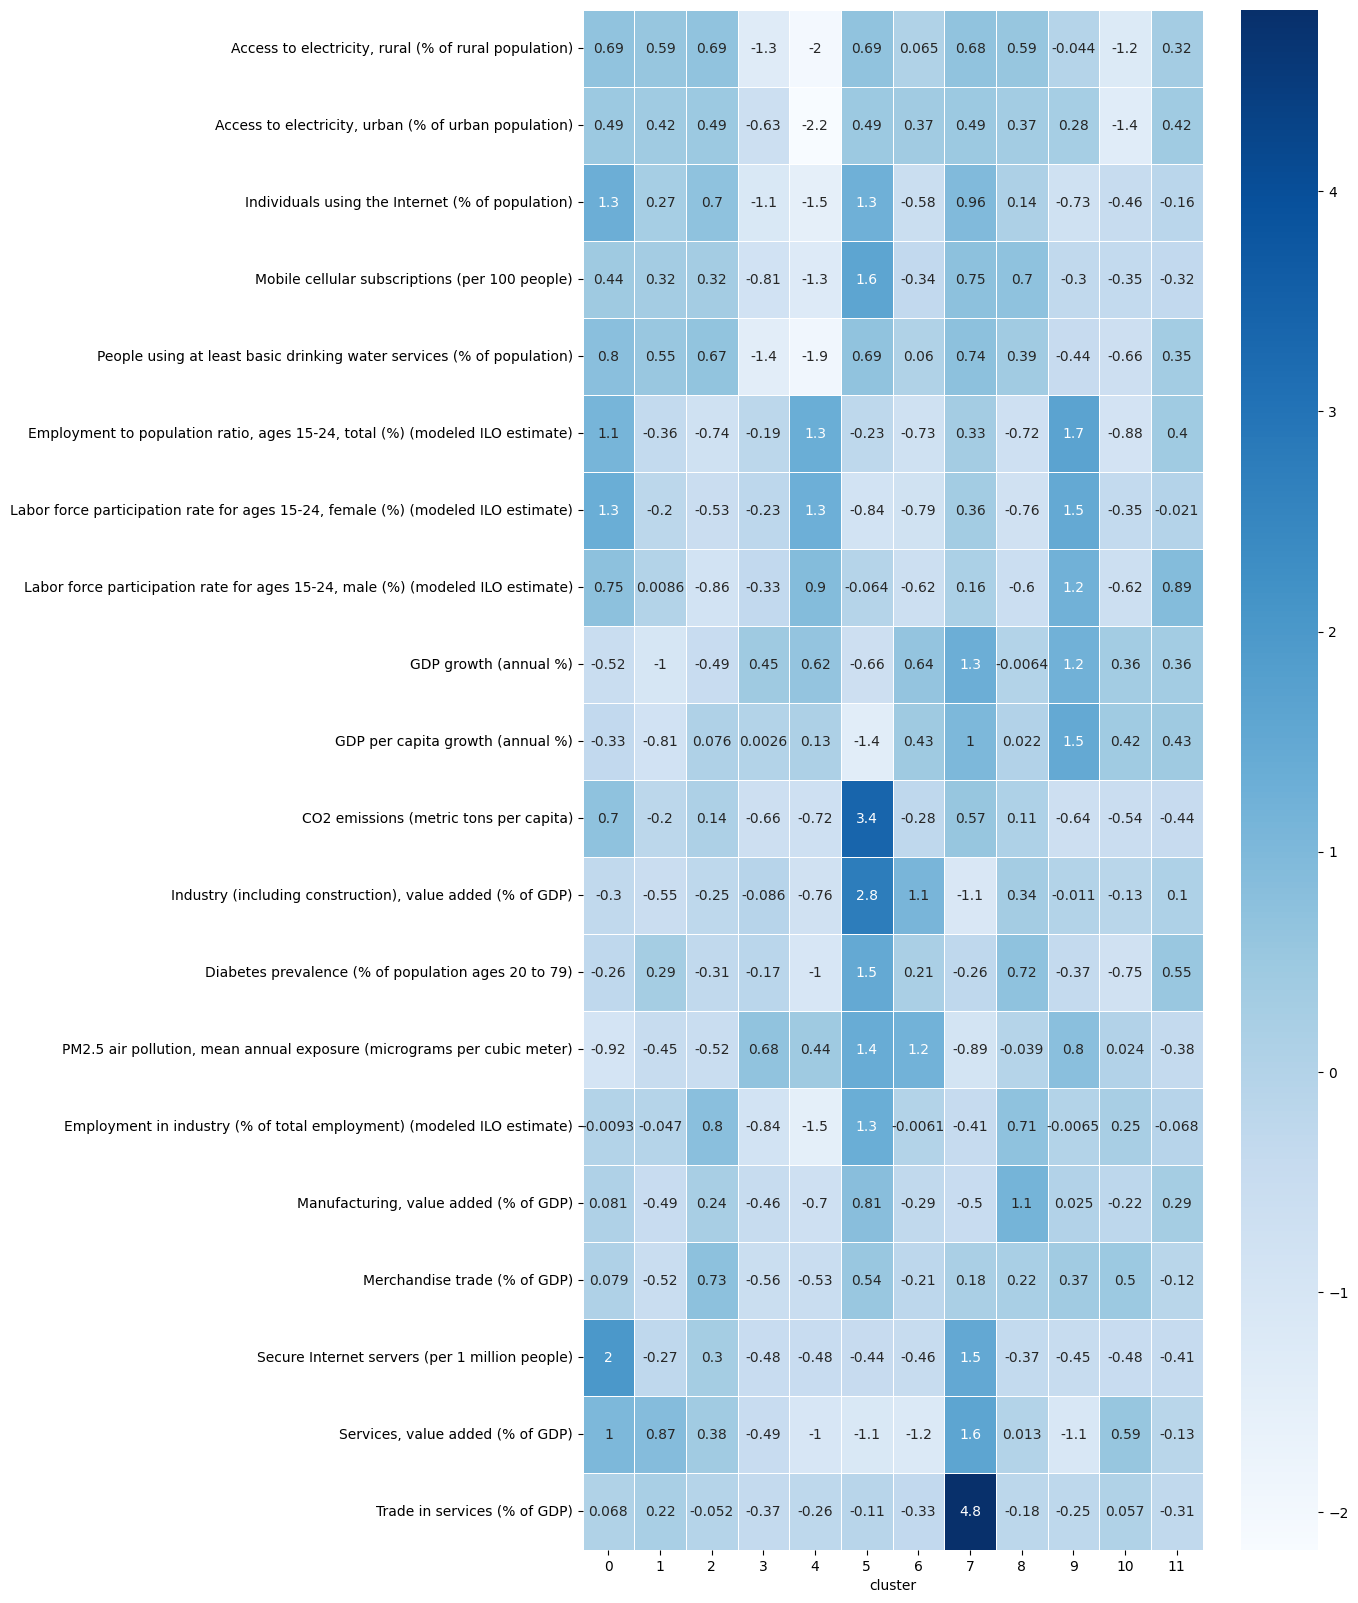

In [11]:

#standardization along columns
df_final_std=(df_final.T-df_final.T.mean())/df_final.T.std()

#Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_final_std, method='ward'))
plt.axhline(y=11, color='r', linestyle='--')

# create clusters
hc = AgglomerativeClustering(n_clusters=12, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(df_final_std)

df_final_T = df_final.T
df_final_T['cluster'] = y_hc
df_final_T.sort_values("cluster", inplace = True, ascending=True)

df_final_std['cluster'] = y_hc
df_final_std.sort_values("cluster", inplace = True, ascending=True)

df_cluster = df_final_T.groupby('cluster').mean()
df_cluster_std = df_final_std.groupby('cluster').mean()

#Heatmap of cluster characteristics
plt.figure(figsize=(10,20))
sns.heatmap(df_cluster_std.T, cmap="Blues", linewidths=.5)

#Heatmap of cluster characteristics based on factor analysis
f0 = [indicators[i] for i in (0, 1, 14, 20, 23)]
f1 = [indicators[i] for i in (10, 16, 17)]
f2 = [indicators[i] for i in (11, 12)]
f3 = [indicators[i] for i in (4, 15)]
f4 = [indicators[i] for i in (7, 22)]
f5 = [indicators[i] for i in (9, 18, 19)]
f6 = [indicators[i] for i in (25, 26, 27)]

indicators_factor = f0 + f1 + f2 + f3 + f4 + f5 + f6
df_cluster_std_selected = df_cluster_std.T.loc[indicators_factor]

#Heatmap of cluster characteristics
plt.figure(figsize=(10,20))
sns.heatmap(df_cluster_std_selected, annot=True, cmap="Blues", linewidths=.5)

#count the number of countries in cluster
num_of_countries = []
for n in range(len(set(y_hc))):
    num_of_countries.append(sum(df_final_T['cluster'] == n))
    
df_cluster['num of countries'] = num_of_countries
df_cluster_std['num of countries'] = num_of_countries

columns = list(df_cluster.columns)
columns = columns[-1:] + columns[:-1]

df_cluster = df_cluster.reindex(columns=columns)
df_cluster_std = df_cluster_std.reindex(columns=columns)


In [12]:

#=============================Output as excel==================================
output = 'output_' + time.asctime(time.localtime(time.time())).replace(' ','_').replace(':','') + '.xlsx'

with pd.ExcelWriter(output) as writer:
    df_cluster.to_excel(writer, sheet_name='Cluster')
    df_cluster_std.to_excel(writer, sheet_name='Cluster_std')
    df_cluster_std_selected.to_excel(writer, sheet_name='Cluster_std_selected')
    df_final_T.to_excel(writer, sheet_name='Result')
    df_final_std.to_excel(writer, sheet_name='Result_std')
    df_final.to_excel(writer, sheet_name='Final data')
    df_dropped.to_excel(writer, sheet_name='Dropped')
    df.to_excel(writer, sheet_name='Raw data')
    loads.to_excel(writer, sheet_name='Loading')
    corrMatrix.to_excel(writer, sheet_name='Correlation Matrix')
    datalog.to_excel(writer, sheet_name='Datalog')
    datalog_selected.to_excel(writer, sheet_name='Datalog_selected')